In [29]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
alcoholDf = pd.read_csv("/home/amritpal-singh/Downloads/Alcohol_Sales.csv")
alcoholDf

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [31]:
alcoholDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [32]:
travelDf = pd.read_csv("/home/amritpal-singh/Downloads/Miles_Traveled.csv")
travelDf.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [33]:
travelDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [34]:
alcoholDf['DATE'] = pd.to_datetime(alcoholDf['DATE'])
alcoholDf = alcoholDf.rename(columns={'DATE': 'ds', 'S4248SM144NCEN': 'y'})

In [35]:
train_size = int(len(alcoholDf) * 0.8)
train_alcoholDf = alcoholDf[:train_size]
test_alcoholDf = alcoholDf[train_size:]
train_alcoholDf['y'] = train_alcoholDf['y'].astype('float64')
train_alcoholDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      260 non-null    datetime64[ns]
 1   y       260 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [36]:
os.environ["NUMEXPR_MAX_THREADS"] = "8"
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(train_alcoholDf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future = model.make_future_dataframe(periods=len(test_alcoholDf))
forecast = model.predict(future)

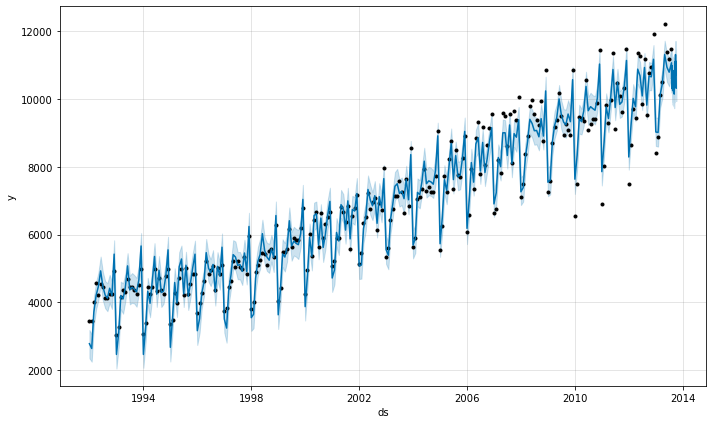

In [38]:
fig = model.plot(forecast)
fig.show()

In [39]:
true_values = test_alcoholDf['y'].values
predicted_values = forecast['yhat'].iloc[-len(test_alcoholDf):].values

In [40]:
rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
mae = mean_absolute_error(true_values, predicted_values)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 2039.105262140213
MAE: 1681.9959607176502


In [41]:
travelDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [42]:
travelDf['DATE'] = pd.to_datetime(travelDf['DATE'])
travelDf = travelDf.rename(columns={'DATE': 'ds', 'TRFVOLUSM227NFWA': 'y'})

In [43]:
travelDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [44]:
train_size = int(len(travelDf) * 0.8)
train_travelDf = travelDf[:train_size]
test_travelDf = travelDf[train_size:]

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [46]:
warnings.filterwarnings('ignore')

arima_model = ARIMA(train_travelDf['y'], order=(5, 1, 0))
arima_result = arima_model.fit()

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  470
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5008.664
Date:                Mon, 24 Jun 2024   AIC                          10029.329
Time:                        23:50:09   BIC                          10054.233
Sample:                             0   HQIC                         10039.128
                                - 470                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1358      0.056     -2.417      0.016      -0.246      -0.026
ar.L2          0.2145      0.059      3.640      0.000       0.099       0.330
ar.L3         -0.0082      0.084     -0.098      0.9

In [47]:
predictions = arima_result.forecast(steps=len(test_travelDf))

rmse = np.sqrt(mean_squared_error(test_travelDf['y'], predictions))
mae = mean_absolute_error(test_travelDf['y'], predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 39593.701226019686
MAE: 35859.296421703984


In [48]:
future_steps = 12 
forecast = arima_result.forecast(steps=future_steps)

future_dates = pd.date_range(start=travelDf['ds'].iloc[-1] + pd.Timedelta(days=30), periods=future_steps, freq='M')
forecast_df = pd.DataFrame({'ds': future_dates, 'y': forecast})
print(forecast_df)

            ds              y
470 2018-12-31  221480.966406
471 2019-01-31  216004.799330
472 2019-02-28  221961.682818
473 2019-03-31  219935.318544
474 2019-04-30  219762.732483
475 2019-05-31  220994.556733
476 2019-06-30  218819.691738
477 2019-07-31  220517.724257
478 2019-08-31  219621.903982
479 2019-09-30  219822.920797
480 2019-10-31  220228.562084
481 2019-11-30  219588.394557
